In [89]:
# crm 2019
import os
import datetime
import logging

import core
from radaraxes import radar_factory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))
logger = logging.getLogger("ipynb")
date_str = datetime.datetime.now().strftime("%Y%m%d")
dest_name = "DW" + date_str
data_dir = "../dat"
npz_dir = os.path.join(data_dir, date_str + "/")
list_path = os.path.join(data_dir, "users.txt")
sns.set(style="darkgrid")

In [3]:
# spotify username authorization or empty for client credentials
sp = core.do_auth("chadrm9")

INFO:core:User chadrm9 authorized!
INFO:core:Client credentialized!


In [5]:
# copy_playlist(sp, username, source_playlist_name, destination_playlist_name, owner)
ss_id = core.copy_playlist(sp, "chadrm9", "Discover Weekly", dest_name, "spotify")

INFO:core:Playlist Discover Weekly copied to DW20190819 for chadrm9


In [4]:
# fetch_user_list(sp, _input_username_list, output_data_dir)
user_list = core.fetch_user_list(sp, list_path, npz_dir)

INFO:core:Loaded chadrm9 from ../dat/20190819/chadrm9.npz
INFO:core:Loaded 1296225797 from ../dat/20190819/1296225797.npz
INFO:core:Loaded x4s7phb9n8c8frmj2d7hfrrce from ../dat/20190819/x4s7phb9n8c8frmj2d7hfrrce.npz
INFO:core:Loaded dudja from ../dat/20190819/dudja.npz


In [ ]:
# print audio features of tracks for all users' playlists
for user in user_list:
    user.print_af()

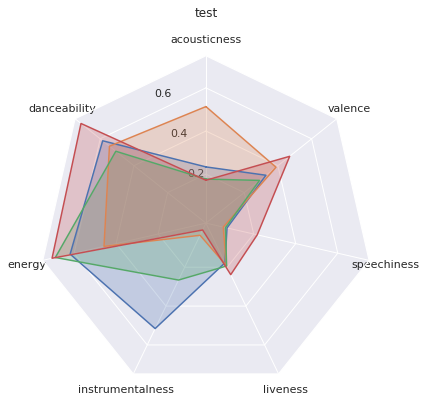

In [105]:
np_af_mean_flt = np.vstack([np.mean(user.np_af_flt, axis=0) for user in user_list])
np_af_mean_flt = np.delete(np_af_mean_flt, [5, 8], 1)
N = len(np_af_mean_flt[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                'liveness', 'speechiness', 'valence']
title = "test"
case_data = np_af_mean_flt

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

plt.show()